# Experiment 2

In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp

pd.options.display.float_format = '{:.3f}'.format

In [147]:
!ls

Exp1.ipynb       log_out.csv      returns.csv      speed.csv
Exp2.ipynb       main.py          returns_in.csv   volume.csv
Exp3.ipynb       new_data.csv     returns_out.csv
log_in.csv       packets.csv      returns_stable.R


In [148]:
def read_data(filename):
    data = pd.read_csv(filename)
    data.rename(columns={'Time': 'time', 'IN Traffic': 'in', 'OUT Traffic': 'out'}, inplace=True)
    data['time'] =  pd.to_datetime(data['time'], format='%b-%d-%y %H:%M')
    return data


In [149]:
packets_data = read_data('new_data.csv')
packets_data = packets_data.iloc[::-1]
packets_data.drop([493, 492, 491, 490, 489, 488, 487, 486, 485, 247 ], axis=0, inplace=True)
packets_data.reset_index(inplace=True)
packets_data.drop('index', axis=1, inplace=True)

In [150]:
packets_data.head()

,time,in,out
0,2021-03-24 17:00:00,2257707,1788947
1,2021-03-24 18:00:00,3053010,2464904
2,2021-03-24 19:00:00,3675147,2498893
3,2021-03-24 20:00:00,600655,467344
4,2021-03-24 21:00:00,429769,370377


Working with packets data

In [151]:
packets_data[['in', 'out']].describe()

,in,out
count,610.000,610.000
mean,1481865.225,1067225.021
std,1514998.273,964574.125
min,159439.000,290544.000
25%,413472.750,377574.750
50%,675790.000,554595.000
75%,2297970.250,1537639.000
max,8035464.000,4336352.000


In [152]:
def plot_dist_time(data, figsize=(10, 5), ylabel='', draw_line=False):
    plt.figure(figsize=figsize)
    plt.plot(data)
    if draw_line:
        alpha = (data[len(data) - 1] - data[0]) / len(data)
        plt.plot(alpha*np.arange(0, len(data) - 1), color='red', linewidth=0.5)
    plt.ylabel(ylabel)
    plt.xlabel('Time (min)')
    plt.grid()
    plt.show()

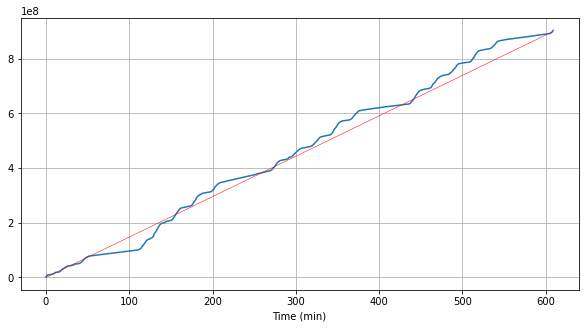

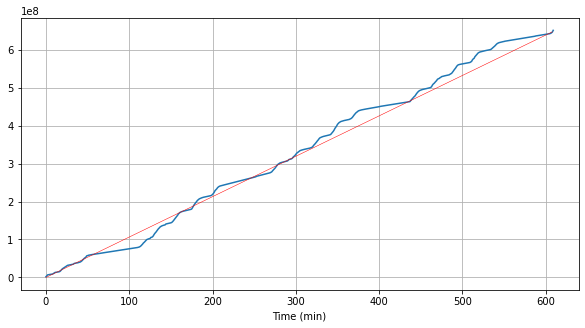

In [153]:
plot_dist_time(np.cumsum(packets_data['in']), draw_line=True)
plot_dist_time(np.cumsum(packets_data['out']), draw_line=True)

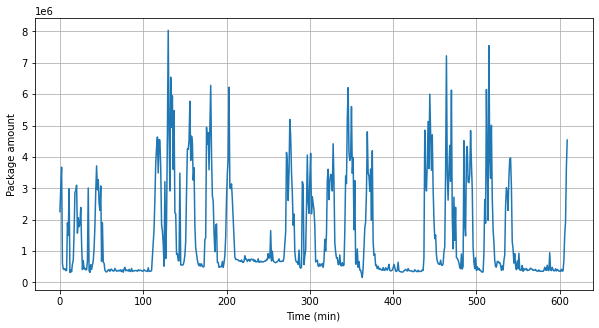

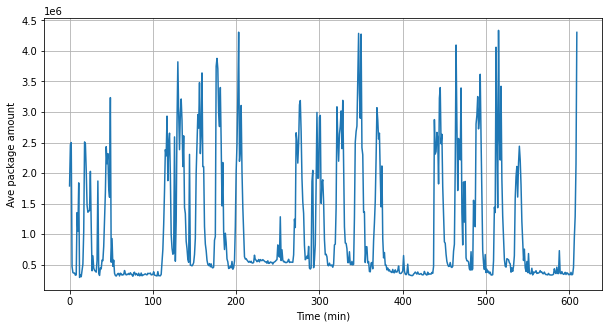

In [154]:
plot_dist_time(packets_data['in'], ylabel='Package amount')
plot_dist_time(packets_data['out'], ylabel='Ave package amount')

In [156]:
log_in = np.log(packets_data['in'])
log_in[:5]

0   14.630
1   14.932
2   15.117
3   13.306
4   12.971
Name: in, dtype: float64

In [157]:
log_out = np.log(packets_data['out'])
log_out[:5]

0   14.397
1   14.718
2   14.731
3   13.055
4   12.822
Name: out, dtype: float64

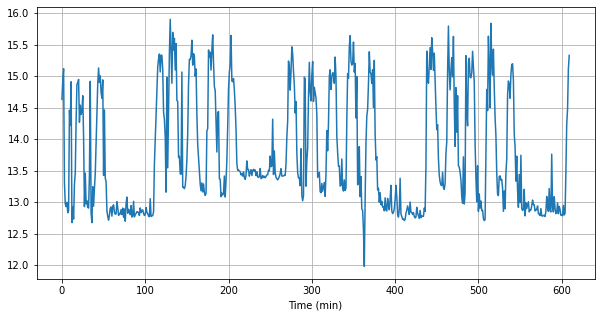

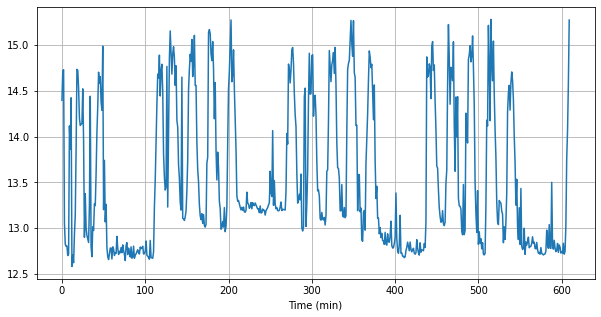

In [158]:
plot_dist_time(log_in)
plot_dist_time(log_out)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


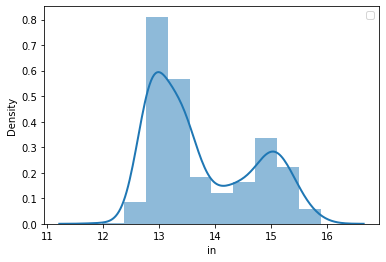

In [185]:
sns.distplot(log_in, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.legend(loc='upper right')
plt.show()

In [159]:
pd.DataFrame(log_in).to_csv('log_in.csv')
pd.DataFrame(log_out).to_csv('log_out.csv')

In [186]:
returns_in = np.log(packets_data.iloc[1:]['in'].values/packets_data.iloc[:-1]['in'].values)
returns_in[:5]

array([ 0.30177829,  0.18546514, -1.81132768, -0.33477287, -0.04163245])

In [187]:
returns_out = np.log(packets_data.iloc[1:]['out'].values/packets_data.iloc[:-1]['out'].values)
returns_out[:5]

array([ 0.32052568,  0.01369497, -1.67653751, -0.2325442 , -0.02236075])

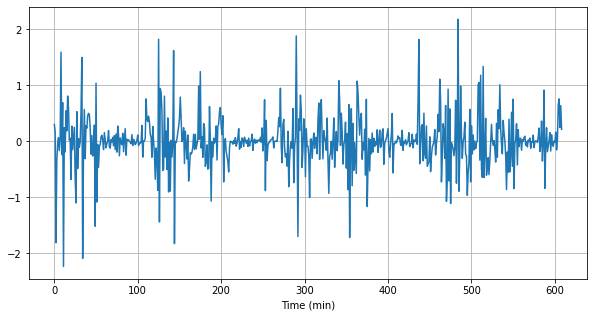

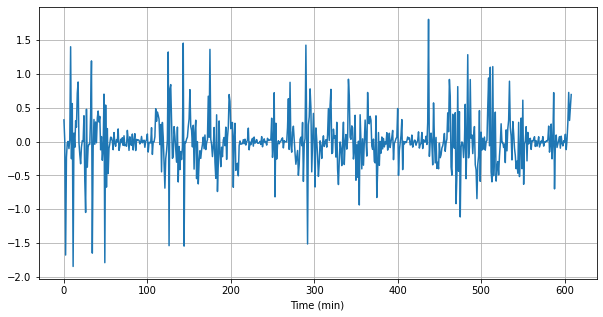

In [188]:
plot_dist_time(returns_in)
plot_dist_time(returns_out)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


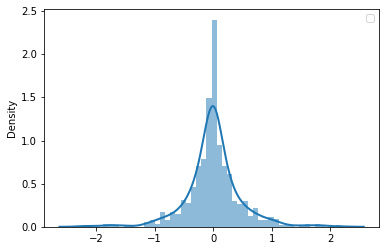

In [190]:
sns.distplot(returns_in, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2})
plt.legend(loc='upper right')
plt.show()

In [189]:
pd.DataFrame(returns_in).to_csv('returns_in.csv')
pd.DataFrame(returns_out).to_csv('returns_out.csv')

In [160]:
def plot_hist(data, figsize=(10, 5), bins=50):
    plt.figure(figsize=figsize)
    plt.hist(data, bins=bins)
    plt.ylabel('Count')
    plt.xlabel('r(t)')
    plt.grid()
    plt.show()

In [84]:
import levy

In [170]:
levy.fit_levy(returns_in) # -- Fit a stable distribution to x

(par=0, alpha=1.19, beta=0.03, mu=-0.01, sigma=0.17, 313.4596547361366)

In [86]:
levy.fit_levy(returns_out)

(par=0, alpha=1.02, beta=0.01, mu=-0.01, sigma=0.11, 152.90671527889415)

In [20]:
pd.DataFrame(returns_in).to_csv('returns.csv')

In [167]:
levy.fit_levy(log_in)

(par=0, alpha=0.94, beta=0.99, mu=13.16, sigma=0.35, 756.7787130439675)

In [223]:
def compare_real_and_fake(real, fake, title='', bins=50):
    plt.figure(figsize=(7, 5))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(real, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(fake, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generated data for r(t)')
    plt.title(title)
    plt.xlim((-5, 5))
    plt.legend(loc='upper right')
    plt.show()
    
    print('KS-test: ', ks_2samp(real, fake))


In [231]:
# alpha, beta, mu, sigma
ml = levy.random(1.224989886, 0.033847805, -0.007253383, 0.180717441, shape=(2000,))
it = levy.random(1.310289096, 0.109829441, 0.006332521, 0.186019719, shape=(2000,))
qu = levy.random(1.238000000, 0.102000000, -0.004488745, 0.182426998,  shape=(2000,))
mm = levy.random(1.69887754, 0.05226013, -0.00302819, 0.26018827, shape=(2000,))

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


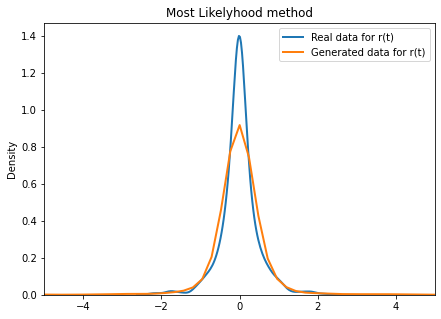

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


KS-test:  KstestResult(statistic=0.048485221674876844, pvalue=0.21403181299541685)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


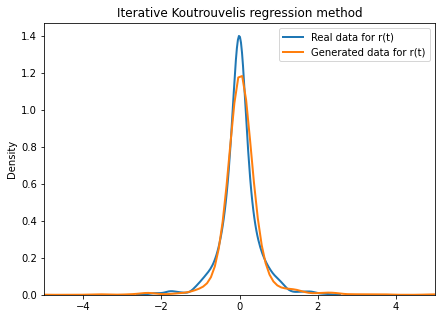

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


KS-test:  KstestResult(statistic=0.10054761904761905, pvalue=0.00014493513439473027)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


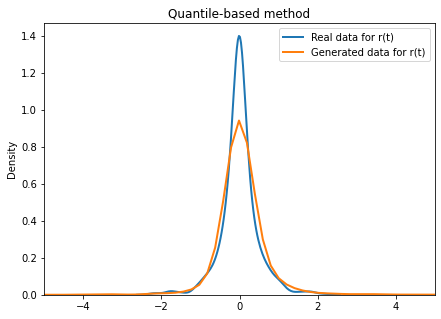

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


KS-test:  KstestResult(statistic=0.07044499178981938, pvalue=0.018345375954632148)


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


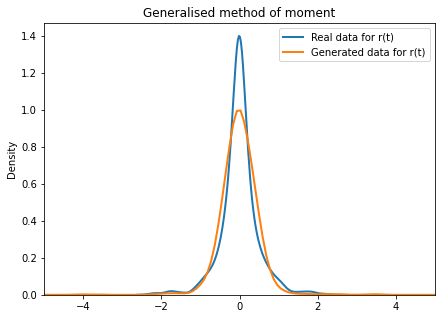

KS-test:  KstestResult(statistic=0.08444499178981937, pvalue=0.002387176418754633)


In [232]:
compare_real_and_fake(returns_in, ml, 'Most Likelyhood method')
compare_real_and_fake(returns_in, it, 'Iterative Koutrouvelis regression method')
compare_real_and_fake(returns_in, qu, 'Quantile-based method')
compare_real_and_fake(returns_in, mm, 'Generalised method of moment')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

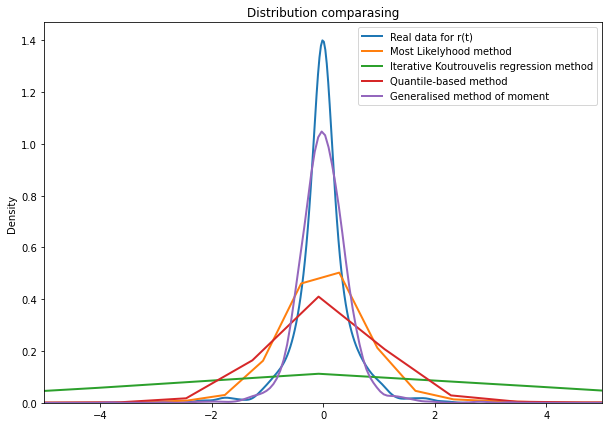

In [226]:
    plt.figure(figsize=(10, 7))
#     plt.hist(real, bins, alpha=0.5, label='Real data for r(t)', density=True)
#     plt.hist(fake, bins, alpha=0.5, label='Generated data for r(t)', density=True)
    sns.distplot(returns_in, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Real data for r(t)')
    sns.distplot(ml, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Most Likelyhood method')
    sns.distplot(it, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Iterative Koutrouvelis regression method')
    sns.distplot(qu, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Quantile-based method')
    sns.distplot(mm, hist=False, kde = True,
                 hist_kws = {'alpha': 0.5},
                 kde_kws = {'linewidth': 2},
                 label = 'Generalised method of moment')
    plt.title('Distribution comparasing')
    plt.xlim((-5, 5))
    plt.legend(loc='upper right')
    plt.show()

In [227]:
import hurst

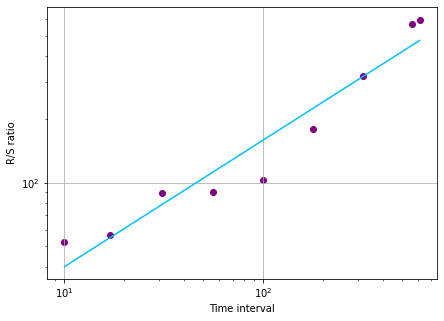

H=0.6019, c=9.9952


In [228]:
H, c, data = hurst.compute_Hc(packets_data['in'], kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [209]:
H

0.6018985185155356

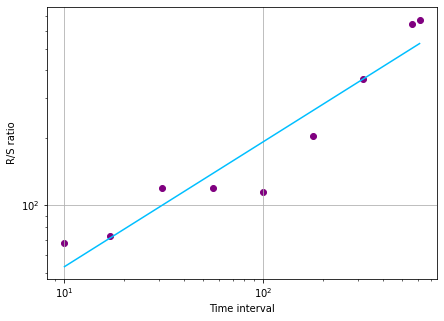

H=0.5580, c=14.7201


In [210]:
H, c, data = hurst.compute_Hc(packets_data['out'], kind='change', simplified=True)

# Plot
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [125]:
H

0.563627639518724